# Heart Attack Analysis

<b>Dataset Information:</b>

1. age : Age of the patient
2. sex : Sex of the patient
3. cp : Chest Pain type chest pain type
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
4. trtbps : Resting blood pressure (in mm Hg)
5. chol : Cholestoral in mg/dl fetched via BMI sensor
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : Resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach : maximum heart rate achieved
9. exng: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak : Previous peak
11. slp: Slope
12. ca: number of major vessels (0-4)
13. thall: Thalium Stress Test result ~ (0,3)
14. output: Target variable

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from scipy.stats import skew, kurtosis
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("heart.csv")
df.rename({'caa':'ca','thalachh':'thalach'},axis=1, inplace=True) #rename column
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Checking dimension of dataset
df.shape

(303, 14)

In [4]:
#Checking For datatypes of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thall    303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b>All attributes are of type 'int' except 'oldpeak'

In [5]:
#Checking for null values
df.isnull().sum()/len(df)*100

age        0.0
sex        0.0
cp         0.0
trtbps     0.0
chol       0.0
fbs        0.0
restecg    0.0
thalach    0.0
exng       0.0
oldpeak    0.0
slp        0.0
ca         0.0
thall      0.0
output     0.0
dtype: float64

<b> No null values

In [6]:
#Checking for duplicate rows
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<b>There is one duplicate value

In [7]:
#Remove the duplicate
df.drop_duplicates(keep='first',inplace=True)

In [8]:
#Checking new shape
df.shape

(302, 14)

In [9]:
# Checking statistical data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exng,oldpeak,slp,ca,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

<Axes: >

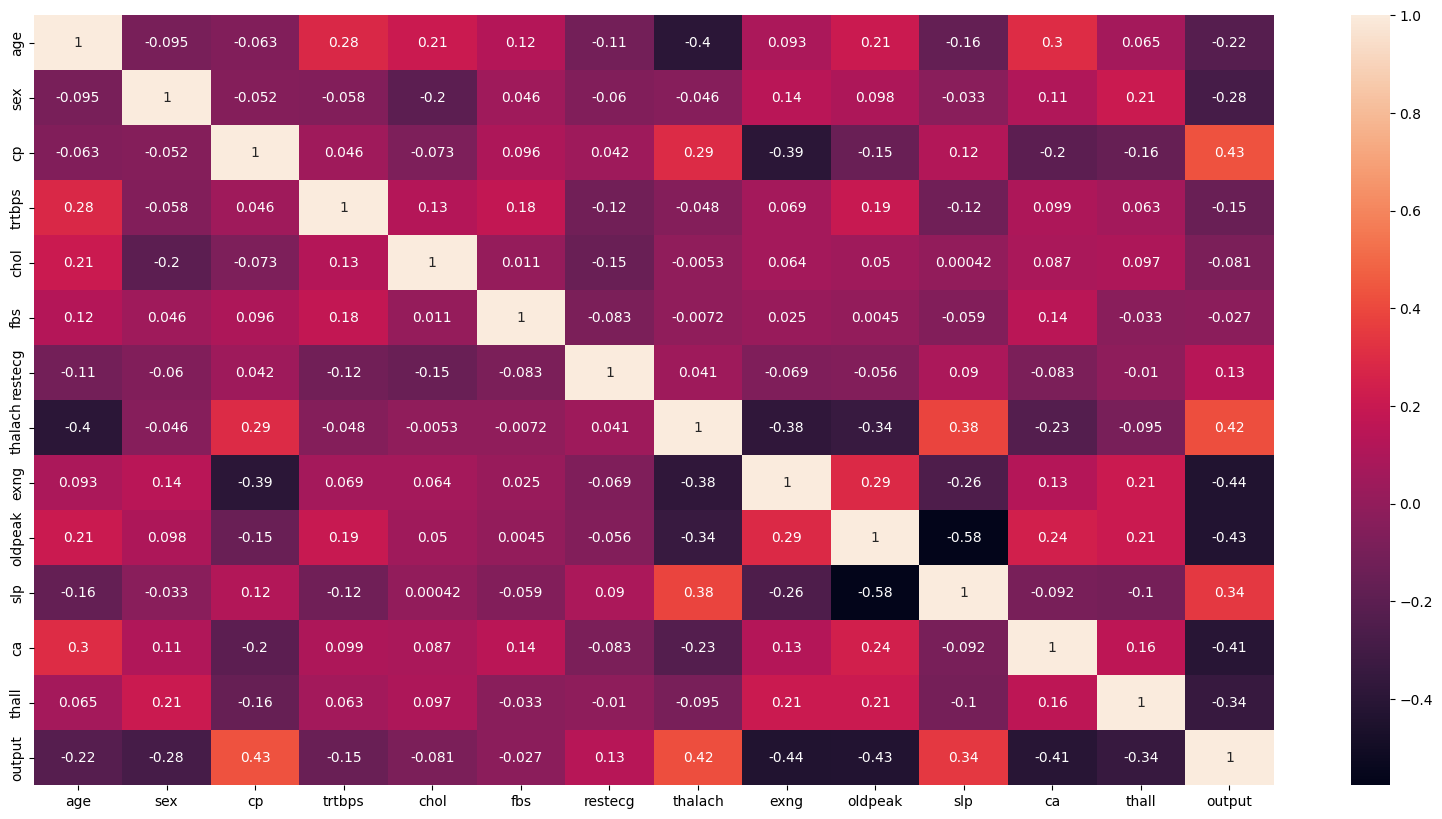

In [10]:
# Computing the correlation matrix
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<b>Insight</b>
<ul>
<li>The heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp</li>
</ul>

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


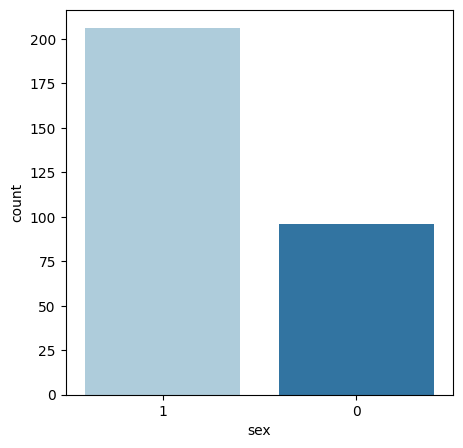

In [11]:
#Breakdown Gender
x=(df['sex'].value_counts())
print(f'Number of people having sex as 0 are {x[0]} and Number of people having sex as 1 are {x[1]}')
fig = plt.figure(figsize=(5,5))
sns.countplot(data=df, x="sex",order=df['sex'].value_counts().index,palette='Paired')
plt.show()

<b>Insight</b>
<ul>
<li>People having gender as 0 (female) are less than twice the people having gender as 1 (male)</li>
</ul>

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


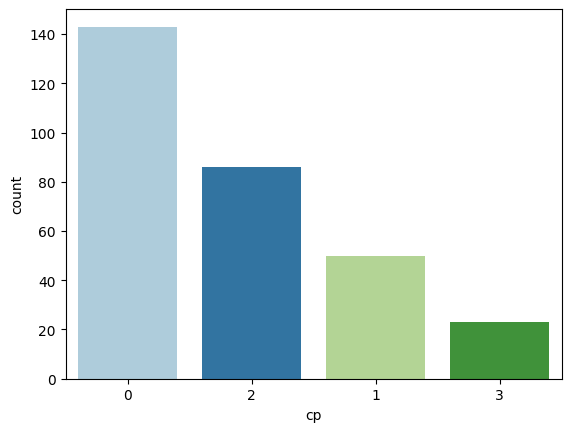

In [12]:
#Breakdown for chest pain
x=(df['cp'].value_counts())
print(x)
sns.countplot(data=df, x="cp", order=df['cp'].value_counts().index, palette='Paired')
plt.show()

<b>Insight</b>
<ul>
<li>It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.</li>
<li>It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest</li>
<li>It can also be observed people with chest pain of type 0 is almost 50% of all the people.</li>
</ul>

0    257
1     45
Name: fbs, dtype: int64


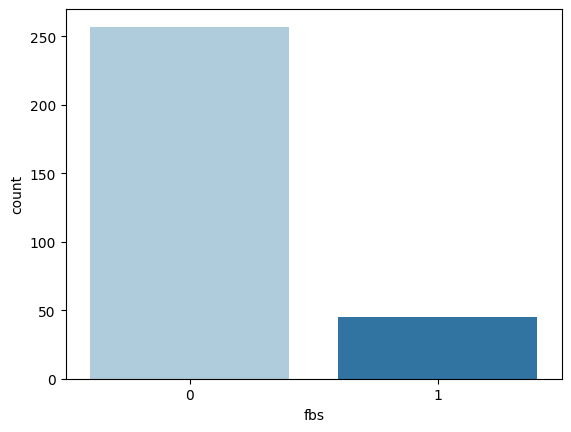

In [13]:
#Breakdown of FBS
x=(df['fbs'].value_counts())
print(x)
sns.countplot(data=df, x="fbs",palette='Paired')
plt.show()

<b>Insight</b>
<ul>
<li>FBS with value 0 is significantly higher than value 1.</li>
<ul>

1    151
0    147
2      4
Name: restecg, dtype: int64


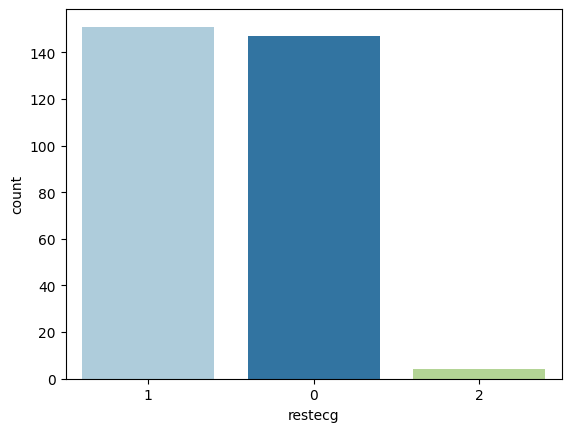

In [14]:
#Breakdown of ECG
x=(df['restecg'].value_counts())
print(x)
sns.countplot(data=df, x="restecg", order=df['restecg'].value_counts().index, palette='Paired')
plt.show()

<b>Insight</b>
<ul>
<li>ECG count is almost the same for type 0 and 1. Also, for type 2 is very lowest comparison to type 0 and 1.</li>
<ul>

<Axes: xlabel='age', ylabel='Density'>

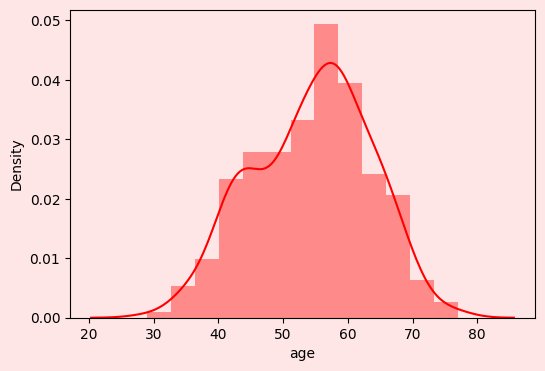

In [15]:
#Density distribution for Age
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
sns.distplot(df.age, color="red", label="Age", kde= True)
# plt.legend()

<b>Insight</b>
<ul>
<li>Density distribution is highest for age group 55 to 60</li>
<ul>

<Axes: xlabel='trtbps', ylabel='Density'>

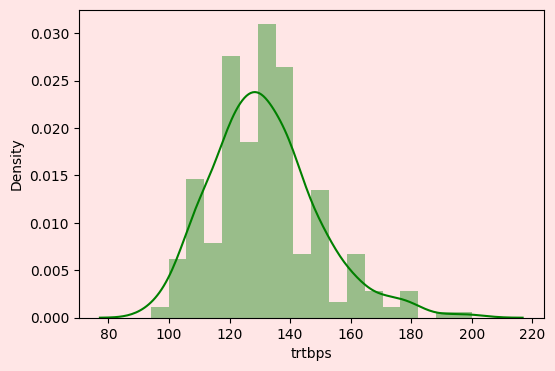

In [16]:
#Density distribution for Blood Pressure
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax1.set_facecolor(background_color)

sns.distplot(df.trtbps , color="green", label="Resting Blood Pressure", kde= True)

<b>Insight</b>
<ul>
<li>Trtbs (Blood Pressure) has the highest count around 130</li>
<ul>

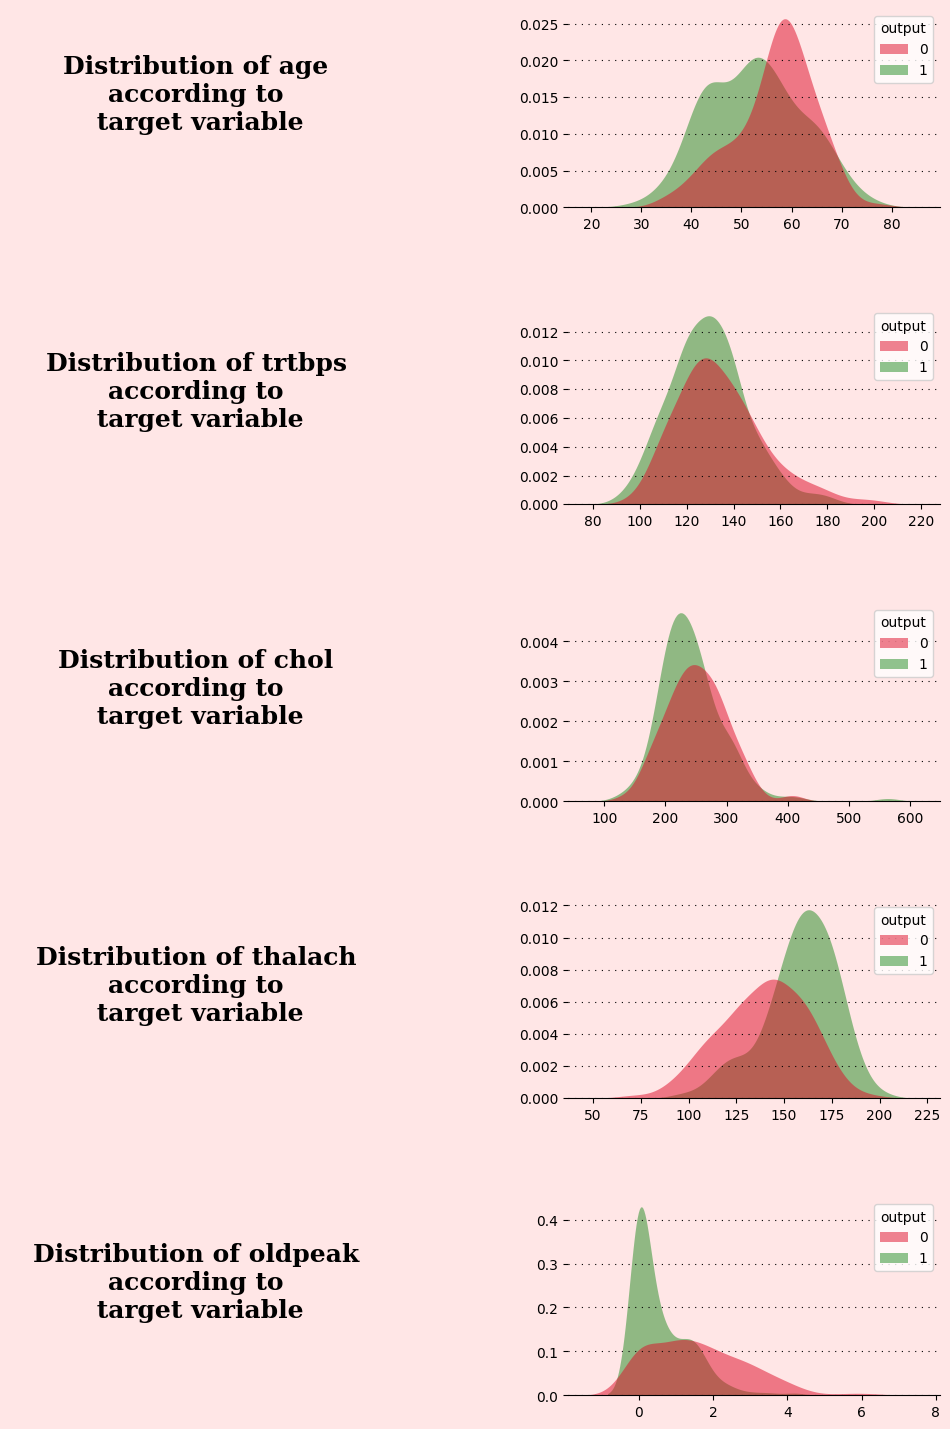

In [17]:
#Distribution of some feature according to target variable
fig = plt.figure(figsize=(12,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalach\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalach',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

<b>Insight</b>
<ul>
<li>It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age vs output, it is evident that this isn't the case. So, based on this distribution, we conclude that younger people have higher chances of heart attack</li>
<li>According to the distribution plot of thalach vs output, people with higher maximum heart rate achieved have higher chances of heart attack.</li>
<li>According to the distribution plot of oldpeak vs output, people with lower previous peak achieved have higher chances of heart attack.</li>
<ul>

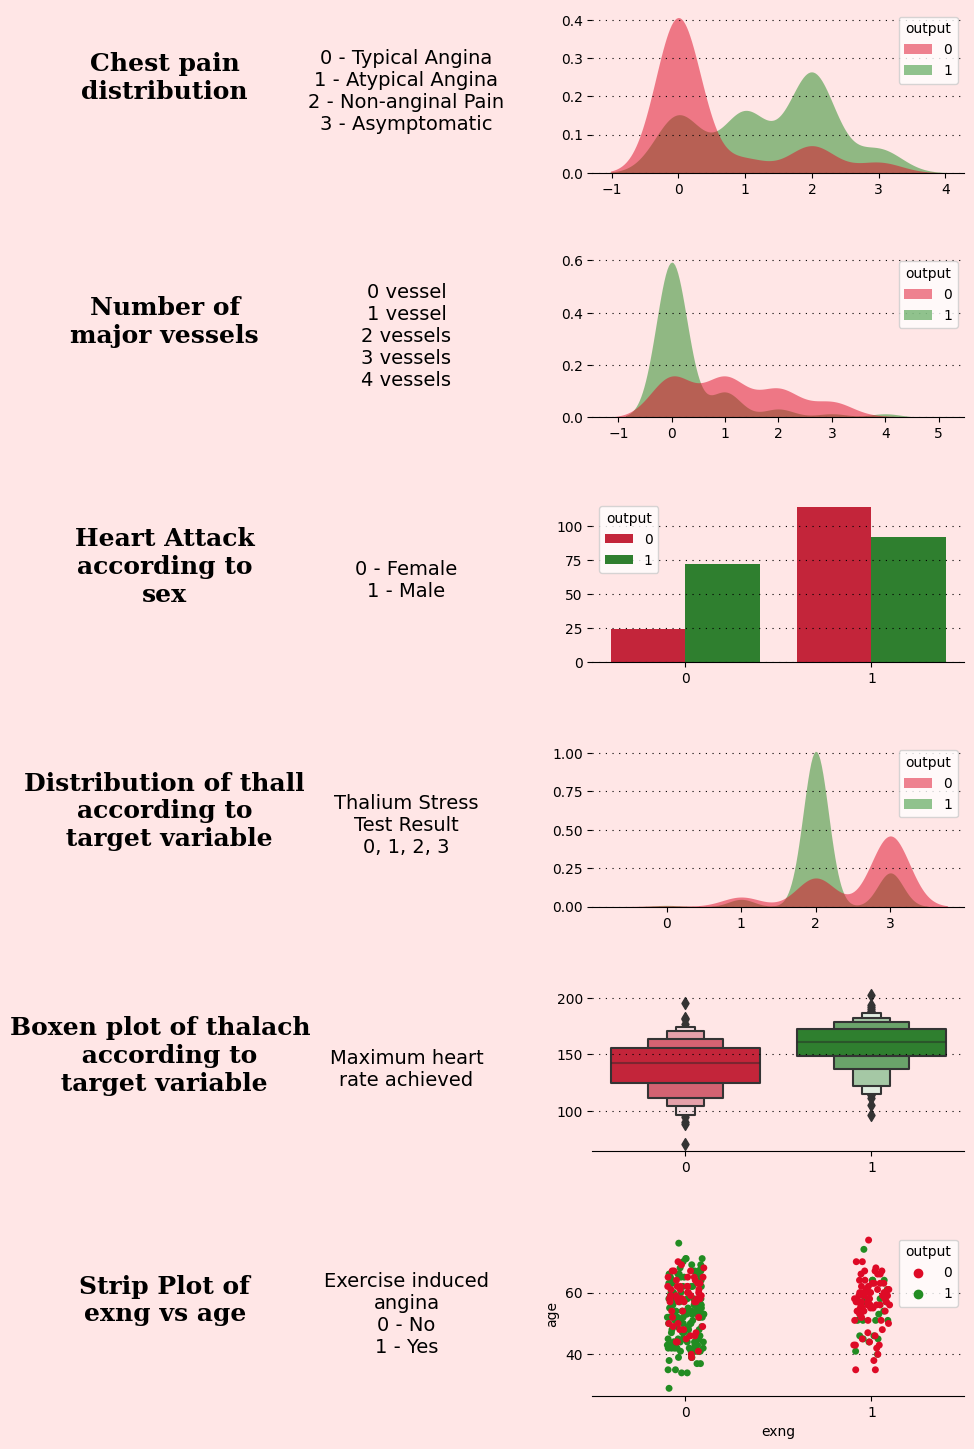

In [18]:
fig = plt.figure(figsize=(12,18))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.35,0.5,"Chest pain\ndistribution\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.35,0.5,"Number of\nmajor vessels\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessel\n1 vessel\n2 vessels\n3 vessels\n4 vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='ca',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.35,0.5,"Heart Attack\naccording to\nsex\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#de0a26","#228c22"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.35,0.5,"Distribution of thall\naccording to\n target variable\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#de0a26","#228c22"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.35,0.5,"Boxen plot of thalach \n according to\n target variable \n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalach',palette=["#de0a26","#228c22"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.35,0.5,"Strip Plot of\nexng vs age\n",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#de0a26","#228c22"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

<b>Insight</b>
<ul>
<li>People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.</li>
<li>People with 0 major vessels, that is with caa = 0 have high chance of heart attack.</li>
<li>People with sex = 1 (male) have higher chance of heart attack disease.</li>
<li>People with thall = 2 have much higher chance of heart attack.</li>
<li>People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.</li>
<ul>

